In [25]:
import pandas as pd
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import ipywidgets as widgets
plt.style.use('fivethirtyeight')

---
# Prisons
---

## Data

**Cleaning dataset that will be used on final version of the notebobok on pandas to make cleaning easier.**

In [26]:
monthly_cdcr_population = pd.read_csv("monthly_cdcr_population.csv")
 

In [28]:
cdcr  = monthly_cdcr_population#.drop(labels= "source_pdf_name")


In [29]:
cdcr.to_csv(r'monthly_cdcr.csv')

## **Widget**

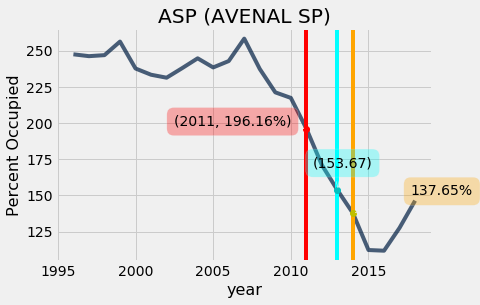

In [30]:
# populations based off the year rather than month
data= Table().read_table("data_for_widget.csv")
grouped = data.group(["institution_name", "year"], sum)

new_percents = grouped.column("total_population sum") / grouped.column("designed_capacity sum") *100
grouped = grouped.with_column("Percent Occupied", new_percents)

institutions = grouped.group(0).column(0)
institutions

inp = widgets.IntSlider(
    value=0,
    min=0,
    max=39,
    step=1,
    description='Institution:',
    orientation='horizontal',
    readout= True,
    readout_format='d'
)

def f(inp):
    inst = grouped.where(0, institutions[inp])
    inst.plot(1, "Percent Occupied")
    year1 = inst.column("year") 
    if np.any(year1 == 2011):
        plt.axvline(x=2011, color = "red")
        point1 = inst.where("year", 2011).column("Percent Occupied").item(0)
        plt.plot([2011], [point1], 'ro')
        
        plt.annotate("(2011, {0}%)".format(round(point1, 2)),
        xy=(2011, round(point1, 2)), xytext=(-15, 0),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2013):
        plt.axvline(x=2013, color = "cyan")
        point2 = inst.where("year", 2013).column("Percent Occupied").item(0) 
        plt.plot([2013], [point2], 'co')
        
        plt.annotate("({0})".format(round(point2, 2)),
        xy=(2013, round(point2, 2)), xytext=(35, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2014):
        plt.axvline(x=2014, color = "orange")
        point3 = inst.where("year", 2014).column("Percent Occupied").item(0)
        plt.plot([2014], [point3], 'yo')
        
        plt.annotate("{0}%".format(round(point3, 2)),
        xy=(2014, round(point3, 2)), xytext=(120, 15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        
    plt.title(institutions[inp])
    
out = widgets.interactive_output(f, {'inp': inp})
#out.clear_output()

In [31]:
#widgets.HBox([widgets.VBox([inp]), out])

In [32]:
# NOTES ABOUT THE WIDGET:
#Do not worry about the code in the next section.
#You will not have to implement anything like this. 
#The code produces a widget which allows you to 
#interact with the dataset. In this example, you 
#will be able to scroll through all of the prisons 
#in Calfornia, and you can see how the designed 
#capacity versus population has changed over time.

In [33]:
# # attempt 2 not repeating plots
# from ipywidgets import interact, interactive
# from IPython.display import clear_output, display, HTML
# w = interactive(f, inp =(0,39))
# display(w)

## Gender

In [34]:
# Need to come back to male-female instituions divide 
# institutions = grouped.group(0).column(0)
# (institutions)

---
# Jails
---

## Data 

In [35]:
jail_1995 = pd.read_csv("jails_data/1995.csv", header = 1)
jail_1995

,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539,1,143,0,683.00
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983,197,887,166,3233.00
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225,39,158,15,437.00
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.8,0.4,29.6,3.9,54.70
5,Colusa Sheriff's Dept.,Colusa County Jail,1995,10,26,1,31,1,59.00
6,Contra Costa Sheriff's Dept.,Marsh Creek Detention Facility,1995,10,0,0,230,0,230.00
7,Contra Costa Sheriff's Dept.,Martinez Detention Facility,1995,10,647,0,0,0,647.00
8,Contra Costa Sheriff's Dept.,West County Detention Facility,1995,10,597,0,0,0,597.00
9,Del Norte Sheriff's Dept.,Del Norte County Jail,1995,10,65.83,7.22,0,0,73.05


In [36]:
all_years = pd.DataFrame()
for i in range(1995, 2019):
    df_name = "jails_data/" + str(i) + ".csv"
    df = pd.read_csv(df_name, header = 1)
    all_years = pd.concat([all_years, df])
all_years

,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539,1,143,0,683.00
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983,197,887,166,3233.00
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225,39,158,15,437.00
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.8,0.4,29.6,3.9,54.70
5,Colusa Sheriff's Dept.,Colusa County Jail,1995,10,26,1,31,1,59.00
6,Contra Costa Sheriff's Dept.,Marsh Creek Detention Facility,1995,10,0,0,230,0,230.00
7,Contra Costa Sheriff's Dept.,Martinez Detention Facility,1995,10,647,0,0,0,647.00
8,Contra Costa Sheriff's Dept.,West County Detention Facility,1995,10,597,0,0,0,597.00
9,Del Norte Sheriff's Dept.,Del Norte County Jail,1995,10,65.83,7.22,0,0,73.05


First we need to do some data cleaning to account for "d" and "u" values in the data.

In [8]:
all_years[all_years["Unsentenced males"] == 'u']
cleaned = all_years.replace("d", 0)
cleaned = cleaned.replace("u", 0)
cleaned["Unsentenced males"] = cleaned["Unsentenced males"].astype('float64')
cleaned["Unsentenced females"] = cleaned["Unsentenced females"].astype('float64')
cleaned["Sentenced males"] = cleaned["Sentenced males"].astype('float64')
cleaned["Sentenced females"] = cleaned["Sentenced females"].astype('float64')
cleaned.head()

,Jurisdiction,Facility,Year,Month,Unsentenced males,Unsentenced females,Sentenced males,Sentenced females,Total facility ADP
0,Alameda Sheriff's Dept.,Glen Dyer Jail,1995,10,539.00,1.00,143.0,0.00,683.00
1,Alameda Sheriff's Dept.,Santa Rita Jail,1995,10,1983.00,197.00,887.0,166.00,3233.00
2,Amador Sheriff's Dept.,Amador County Jail,1995,10,15.33,1.59,21.7,4.85,43.47
3,Butte Sheriff's Dept.,Butte County Jail,1995,10,225.00,39.00,158.0,15.00,437.00
4,Calaveras Sheriff's Dept.,Calaveras County Jail,1995,10,20.80,0.40,29.6,3.90,54.70


In [9]:
# exporting to a csv file to use for the future
cleaned.to_csv("jails_cleaned.csv")